In [1]:
# Import required modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os 
import matplotlib.lines as mlines
from datetime import datetime
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter

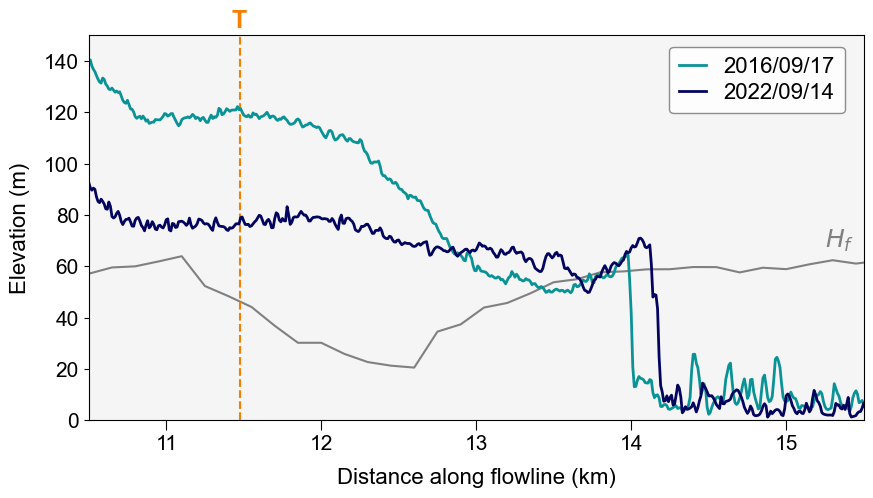

In [ ]:
# Load the sampled ArcticDEM data and specify the dates to be plotted
elevation_data = pd.read_csv('R:/KOGE_BUGT/github/data/ArcticDEM_profiles/koge_bugt_C_ArcticDEM_10M.csv')
elevation_data.set_index('distance', inplace=True)
selected_columns = ['20160917', '20220914']
elevation_data_june = elevation_data[selected_columns]
max_distances_colours = {'20160917': (16200, '#0a9396'),
                         '20220914': (16350, '#03045e')}

# Load the ice surface and elevation data extracted from BedMachine v5. Calculate the flotation height. 
KBC_df = pd.read_csv('R:/KOGE_BUGT/github/data/BedMachine_profiles/150m/KBC_bed_elevation_150m.csv')
KBC_distance = KBC_df['distance']
KBC_bed = KBC_df['bed']
rho_ice = 917   # Density of ice in kg/m³
rho_ocean = 1025  # Density of seawater in kg/m³
mask = KBC_bed < 0
KBC_bed_negative = KBC_bed[mask]
KBC_distance_filtered = KBC_distance[mask]
flotation_thickness = - KBC_bed_negative * (rho_ocean / rho_ice)
flotation_height = KBC_bed_negative + flotation_thickness

## PLOT FIGURE S4 ## 
fig, ax = plt.subplots(figsize=(10, 5))
plt.rcParams["font.family"] = "Arial"
ax.set_facecolor((0.5, 0.5, 0.5, 0.08))
ax.plot(KBC_distance_filtered/1000, flotation_height, color='gray', linestyle='-')
ax.set_ylabel('Elevation (m)', labelpad=10, fontsize=16)
ax.set_xlabel('Distance along flowline (km)', labelpad=10, fontsize=16)
ax.set_xlim(10.5, 15.5)  
ax.set_xticks(range(11, 16, 1))
ax.set_ylim(0, 150)
ax.set_yticks(range(0, 150, 20))
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='x', length=7)
ax.axvline(x=11476.485/1000, color='#f77f00', linestyle='--')
ax.annotate(r"$H_f$", xy=(0.95, 0.45), xycoords="axes fraction", fontsize=18, color="gray", weight="bold") # Label Hf
ax.annotate('T', xy=(0.184, 1.02), xycoords="axes fraction", fontsize=18, color="#f77f00", weight="bold") # Label T

for column in elevation_data_june.columns:
    filtered_data = elevation_data_june[column]
    max_distance, color = max_distances_colours.get(column, (float('inf'), 'gray'))
    filtered_data = filtered_data[filtered_data.index <= max_distance]
    if not filtered_data.empty:
        date_formatted = datetime.strptime(column, '%Y%m%d').strftime('%Y/%m/%d')
        plt.plot(filtered_data.index/1000, filtered_data, label=date_formatted, color=color, linewidth=2)

plt.legend(fontsize=16, bbox_to_anchor=(0.99, 1), framealpha=0.9, edgecolor='gray', fancybox=True, markerscale=3, handlelength=1.2, borderpad=0.45, labelspacing=0.3)
#plt.savefig('R:/KOGE_BUGT/github/figures/Figure_S4.png', dpi=300, bbox_inches='tight')
plt.show()